In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Softmax

400


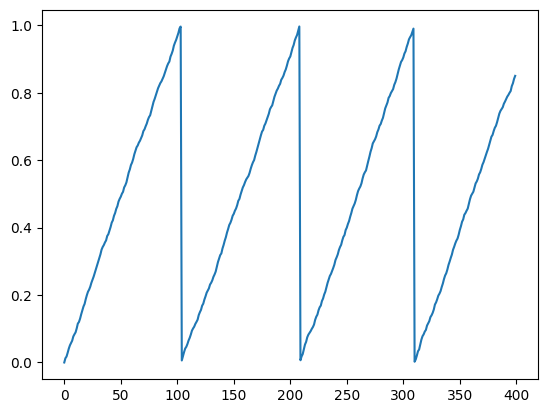

In [2]:
def noisy_rotation(x, v, omega, n, delta):
    if omega:
        np.random.seed(omega)
    omegas = np.random.uniform(-delta/2, delta/2, n-1)
    traj = np.zeros(n)
    traj[0] = x
    for i in range(1, n):
        traj[i] = (traj[i-1] + v + omegas[i-1]) % 1
    return traj

x = 0
v = np.pi / 320
omega = 10
n = 400
delta = 0.01
traj = noisy_rotation(x, v, omega, n, delta)
print(len(traj))
plt.plot(traj)

400


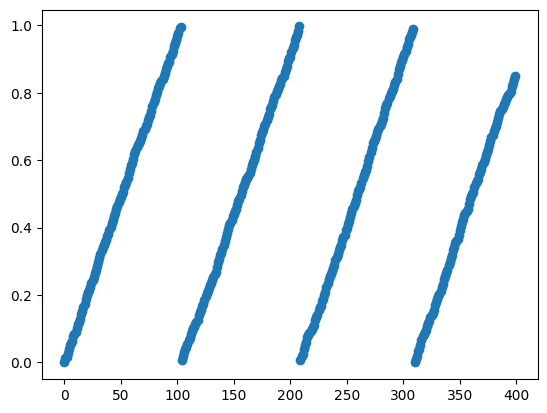

In [3]:
def noisy_rotation(x, v, omega, n, delta):
    if omega:
        np.random.seed(omega)
    omegas = np.random.uniform(-delta/2, delta/2, n-1)
    traj = np.zeros(n)
    traj[0] = x
    for i in range(1, n):
        traj[i] = (traj[i-1] + v + omegas[i-1]) % 1
    return traj

x = 0
v = np.pi / 320
omega = 10
n = 400
delta = 0.01
traj = noisy_rotation(x, v, omega, n, delta)
print(len(traj))
plt.scatter(np.arange(n), traj)

check DMD for noisy rotation

observation:
$f = [f_1, f_2, \cdots, f_{n_1}, g_1, g_2, ..., g_{n_1}]^T$

$f_j(x) = \cos(j2\pi x)$

$g_j(x) = \sin(j2\pi x)$

C:\Users\sunsh\AppData\Local\Temp\ipykernel_20672\3331872224.py:61: RuntimeWarning: invalid value encountered in scalar divide
  trueevalues = [np.sin(j*np.pi*delta)/(j*np.pi*delta)*np.exp(2*np.pi*j*v*(0+1j)) for j in np.arange(-200,200,1)]


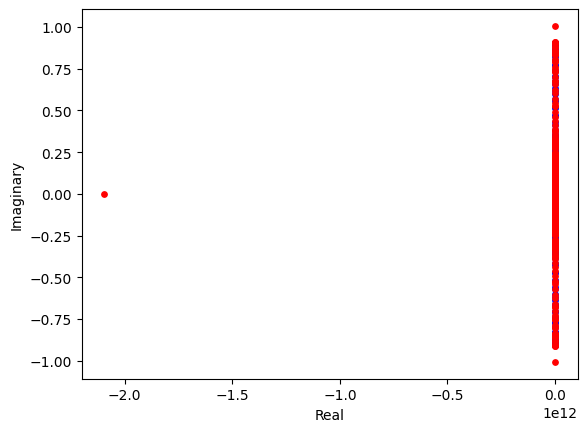

In [25]:
def noisy_rotation(x, v, omega, n, delta):
    if omega:
        np.random.seed(omega)
    omegas = np.random.uniform(-delta/2, delta/2, n-1)
    traj = np.zeros(n)
    traj[0] = x
    for i in range(1, n):
        traj[i] = (traj[i-1] + v + omegas[i-1]) % 1
    return traj

def get_obsvervation_noisy_rotation(n1, traj):
    f = np.zeros((2*n1+1, len(traj)))
    for i in range(n1):
        f[i,:] = np.cos(2*i*np.pi*traj)
        f[i+n1,:] = np.sin(2*i*np.pi*traj)
        f[-1,:] = traj*0 + 1
    return f

###

# from numpy.polynomial import Laguerre
# def get_obsvervation_noisy_rotation(n1, traj):
#     f = np.zeros((n1, len(traj)))
#     for i in range(n1):
#         p = Laguerre([0]*i + [1])
#         f[i,:] = p(traj)
#     return f

###

def get_obsvervation_noisy_rotation_expectation(x_init=0, m=5000, v=np.pi/320, delta=0.01, n1=150, mean_no=100):
    fs = np.zeros((mean_no, 2*n1, m))
    for i in range(mean_no):
        # print(i)
        traj = noisy_rotation(x_init, v, None, m, delta)
        # print(fs[i].shape)
        # print(get_obsvervation_noisy_rotation(n1, traj).shape)
        fs[i] = get_obsvervation_noisy_rotation(n1, traj)
    return np.mean(fs, axis=0), fs

x = 0
v = np.pi / 320
omega = 10
n = 5000
delta = 0.01
traj = noisy_rotation(x, v, omega, n, delta)
n1 = 150
# f, fs = get_obsvervation_noisy_rotation_expectation()
f = get_obsvervation_noisy_rotation(n1, traj)
# print('finish gen')
#DMD
X = f[:,:-1]
Y = f[:,1:]
# print(f.shape)
U,Sig,Vh = np.linalg.svd(X, False)
V = Vh.conj().T
Sig2 = np.diag(Sig)
S = U.conj().T @ Y @ V @ np.linalg.inv(Sig2)
W, V = np.linalg.eig(S)

trueevalues = [np.sin(j*np.pi*delta)/(j*np.pi*delta)*np.exp(2*np.pi*j*v*(0+1j)) for j in np.arange(-200,200,1)]
# extract real part
re = [ele.real for ele in trueevalues]
# extract imaginary part
im = [ele.imag for ele in trueevalues]

# plot the complex numbers
plt.scatter(re[1:], im[1:], s=15, c='blue')

# extract real part
re = [ele.real for ele in W]
# extract imaginary part
im = [ele.imag for ele in W]
# print(V)

# plot the complex numbers
plt.scatter(re[:], im[:], s=15, c='red')
# plt.plot(cre, cim, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()


In [8]:
V

array([[-2.06034842e-02-6.31019781e-02j, -2.06034842e-02+6.31019781e-02j,
         4.44919700e-02-5.41774298e-02j, ...,
         3.17941149e-02-5.22845567e-02j,  8.21805139e-02+1.72648197e-02j,
         8.21805139e-02-1.72648197e-02j],
       [-2.35598589e-02-4.38821757e-02j, -2.35598589e-02+4.38821757e-02j,
         4.41431040e-02-6.21152315e-02j, ...,
         1.59548474e-02-1.99832465e-02j,  4.66806076e-02-1.39204052e-02j,
         4.66806076e-02+1.39204052e-02j],
       [-3.25624265e-02-2.81414274e-02j, -3.25624265e-02+2.81414274e-02j,
         6.52144489e-02-7.00534798e-02j, ...,
         2.31906166e-02+1.54916425e-02j, -1.77993777e-02-3.99342308e-02j,
        -1.77993777e-02+3.99342308e-02j],
       ...,
       [-2.55571097e-17-1.85535161e-16j, -2.55571097e-17+1.85535161e-16j,
         1.12158340e-16-2.47706556e-16j, ...,
         2.63566155e-16-5.92812433e-16j,  8.51788718e-16+8.44701761e-16j,
         8.51788718e-16-8.44701761e-16j],
       [-1.60807402e-16-9.18473775e-18j, -1.

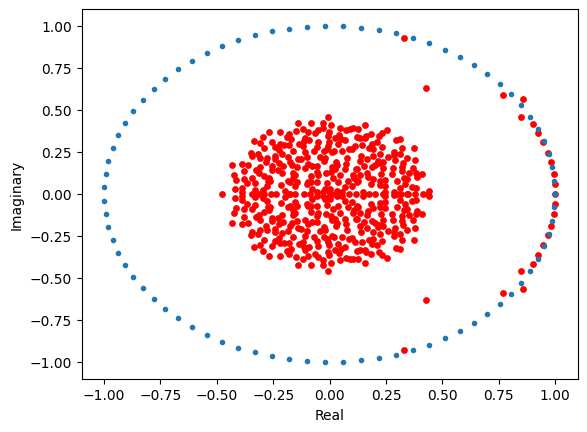

In [14]:
circle = np.exp(0+1j * np.linspace(0, 2*np.pi, 80))
# extract real part
cre = [ele.real for ele in circle]
# extract imaginary part
cim = [ele.imag for ele in circle]
plt.plot(cre, cim, '.')

# plot the complex numbers
plt.scatter(re, im, s=15, c='red')
# plt.plot(cre, cim, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

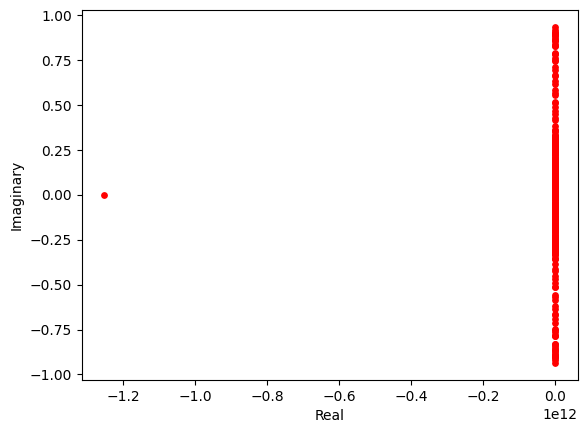

In [6]:
def noisy_rotation(x, v, omega, n, delta):
    if omega:
        np.random.seed(omega)
    omegas = np.random.uniform(-delta/2, delta/2, n-1)
    traj = np.zeros(n)
    traj[0] = x
    for i in range(1, n):
        traj[i] = (traj[i-1] + v + omegas[i-1]) % 1
    return traj

def get_obsvervation_noisy_rotation(n1, traj):
    f = np.zeros((2*n1, len(traj)))
    for i in range(n1):
        f[i,:] = np.cos(2*i*np.pi*traj)
        f[i+n1,:] = np.sin(2*i*np.pi*traj)
    return f

def get_obsvervation_noisy_rotation_expectation(x_init=0, m=5000, v=np.pi/320, delta=0.01, n1=150, mean_no=100):
    fs = np.zeros((mean_no, 2*n1, m))
    for i in range(mean_no):
        # print(i)
        traj = noisy_rotation(x_init, v, None, m, delta)
        # print(fs[i].shape)
        # print(get_obsvervation_noisy_rotation(n1, traj).shape)
        fs[i] = get_obsvervation_noisy_rotation(n1, traj)
    return np.mean(fs, axis=0), fs

x = 0
v = np.pi / 320
omega = 10
n = 5000
delta = 0.01
traj = noisy_rotation(x, v, omega, n, delta)
n1 = 150
f, fs = get_obsvervation_noisy_rotation_expectation()
# f = get_obsvervation_noisy_rotation(n1, traj)
# print('finish gen')
#DMD
X = f[:,:-1]
Y = f[:,1:]
# print(f.shape)
U,Sig,Vh = np.linalg.svd(X, False)
V = Vh.conj().T
Sig2 = np.diag(Sig)
S = U.conj().T @ Y @ V @ np.linalg.inv(Sig2)
W, V = np.linalg.eig(S)

# extract real part
re = [ele.real for ele in W]
# extract imaginary part
im = [ele.imag for ele in W]
# print(V)

circle = np.exp(0+1j * np.linspace(0, 2*np.pi, 80))
# extract real part
cre = [ele.real for ele in circle]
# extract imaginary part
cim = [ele.imag for ele in circle]

# plot the complex numbers
plt.scatter(re, im, s=15, c='red')
# plt.plot(cre, cim, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()


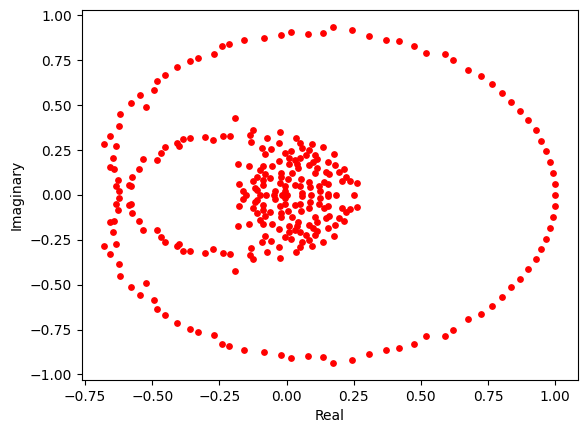

In [7]:
# plot the complex numbers
plt.scatter(re[1:], im[1:], s=15, c='red')
# plt.plot(cre, cim, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

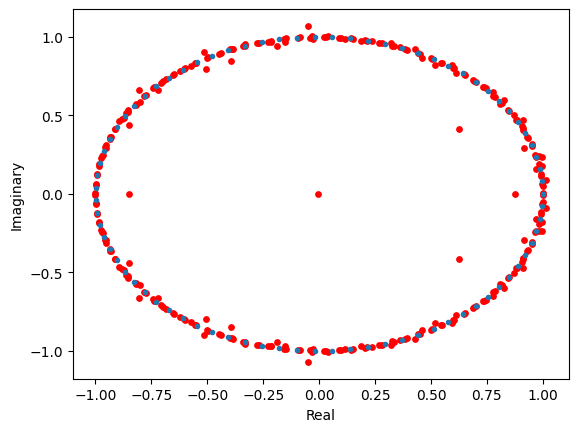

In [8]:
def noisy_rotation(x, v, omega, n, delta):
    np.random.seed(omega)
    omegas = np.zeros(n-1)
    traj = np.zeros(n)
    traj[0] = x
    for i in range(1, n):
        traj[i] = (traj[i-1] + v + omegas[i-1]) % 1
    return traj

x = 0
v = np.pi / 320
omega = 10
n = 5000
delta = 0.01
traj = noisy_rotation(x, v, omega, n, delta)
n1 = 150
f = get_obsvervation_noisy_rotation(n1, traj)
#DMD
X = f[:,:-1]
Y = f[:,1:]
# print(f.shape)
U,Sig,Vh = np.linalg.svd(X, False)
V = Vh.conj().T
Sig2 = np.diag(Sig)
S = U.conj().T @ Y @ V @ np.linalg.inv(Sig2)
W, V = np.linalg.eig(S)

# extract real part
re = [ele.real for ele in W]
# extract imaginary part
im = [ele.imag for ele in W]
# print(V)

circle = np.exp(0+1j * np.linspace(0, 2*np.pi, 80))
# extract real part
cre = [ele.real for ele in circle]
# extract imaginary part
cim = [ele.imag for ele in circle]

# plot the complex numbers
plt.scatter(re, im, s=15, c='red')
plt.plot(cre, cim, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

(100,)


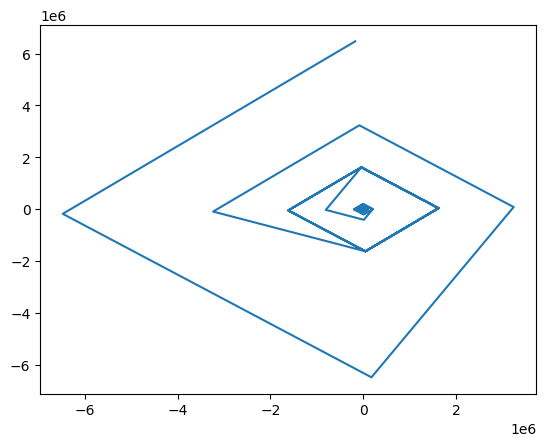

In [9]:
def linear_forward_map(x, omega, n, p1):
    if omega:
        np.random.seed(omega)
    omegas = np.random.choice([1,2], n-1, p=[p1, 1-p1])
    traj = np.zeros((n,2))
    traj[0] = x
    for i in range(1, n):
        traj[i] = np.rot90(np.diag([-omegas[i-1], omegas[i-1]])) @ traj[i-1]
    return traj

x = np.random.rand(2)
omega = 10
n = 100
p1 = 0.75
traj = linear_forward_map(x, omega, n, p1)
print(traj[:,0].shape)
plt.plot(traj[:,0], traj[:,1])

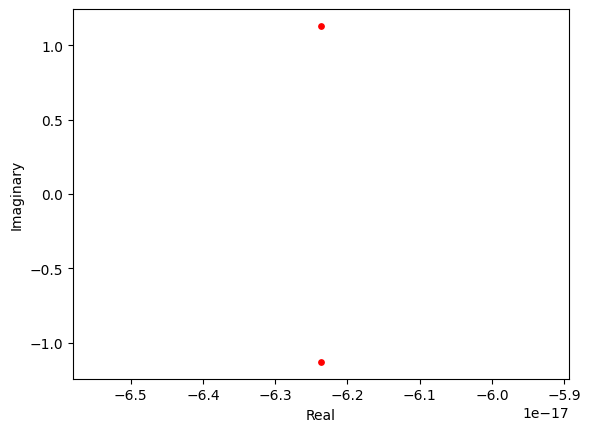

In [10]:
def get_obsvervation_linear_forward_map_expectation(x_init, m=120, mean_no=100, p1=0.75):
    fs = np.zeros((mean_no, 2, m))
    for i in range(mean_no):
        traj = linear_forward_map(x_init, None, m, p1)
        fs[i] = traj.T
    return np.mean(fs, axis=0), fs

x = np.random.rand(2)
omega = 10
n = 100
p1 = 0.75
traj = linear_forward_map(x, omega, n, p1)
n1 = 150
f, fs = get_obsvervation_linear_forward_map_expectation(x)
# f = linear_forward_map(x, omega, n, p1)

#DMD
X = f[:,:-1]
Y = f[:,1:]
# print(f.shape)
U,Sig,Vh = np.linalg.svd(X, False)
V = Vh.conj().T
Sig2 = np.diag(Sig)
S = U.conj().T @ Y @ V @ np.linalg.inv(Sig2)
W, V = np.linalg.eig(S)

# extract real part
re = [ele.real for ele in W]
# extract imaginary part
im = [ele.imag for ele in W]

# plot the complex numbers
plt.scatter(re, im, s=15, c='red')
# plt.plot(cre, cim, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

(2, 120)


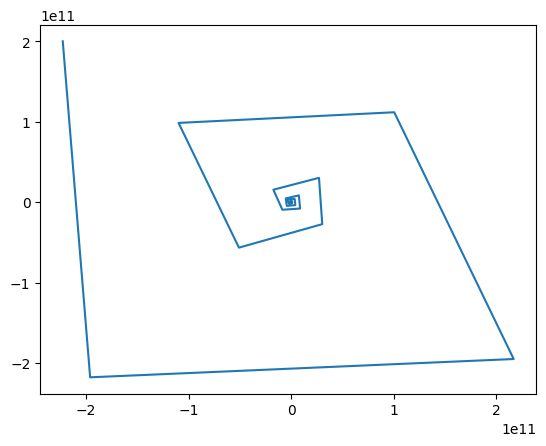

In [11]:
print(f.shape)
plt.plot(f[0], f[1])

$\sqrt{1.56} = 1.24$

In [12]:
W

array([-6.2367758e-17+1.13017426j, -6.2367758e-17-1.13017426j])

In [13]:
from tensorflow.keras.layers import Dense, Dropout, Softmax, concatenate

class HiddenLayer(Layer):

    def __init__(self, units):
        super(HiddenLayer, self).__init__()
        self.units = units
    
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 name='kernel')
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 name='bias')
    def call(self, inputs):
        return tf.matmul(inputs, self.w)+self.b
    
class LinearLayer(Layer):

    def __init__(self):
        super(LinearLayer, self).__init__()
    
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], input_shape[-1]),
                                 initializer='random_normal',
                                 name='kernel')

    def call(self, inputs):
        return tf.matmul(inputs, self.w)

class KoopmanModel(Model):

    def __init__(self, autoencoder_dims, koopman_dim, dim):
        super(KoopmanModel, self).__init__()

        # Define layers
        self.autoencoder_dim = autoencoder_dims
        self.koopman_dim = koopman_dim
        self.dim = dim
        self.encoder_layers = {}
        self.decoder_layers = {}

        for i in range(len(autoencoder_dims)):
            self.encoder_layers.update({i:Dense(autoencoder_dims[i], name='encoder{}'.format(i))})
        self.encoder_layers.update({len(autoencoder_dims):Dense(koopman_dim, name='encoder{}'.format(len(autoencoder_dims)))})
        self.koopman_layer = Dense(koopman_dim, use_bias=False, name='linear koopman')
        for i in range(len(autoencoder_dims)):
            self.decoder_layers.update({len(autoencoder_dims)-1-i:Dense(autoencoder_dims[i], name='decoder{}'.format(i))})
        self.decoder_layers.update({len(autoencoder_dims):Dense(dim, name='encoder{}'.format(len(autoencoder_dims)))})

    def encoder(self, inputs):
        gx = self.encoder_layers[0](inputs)
        gx = tf.nn.relu(gx)
        for i in range(1, len(self.autoencoder_dim)+1):
            gx = self.encoder_layers[i](gx)
            gx = tf.nn.relu(gx)
        return gx

    def linear_koopman(self, inputs):
        gx_next = self.koopman_layer(inputs)
        return gx_next
    
    def decoder(self, inputs):
        x_next = self.decoder_layers[0](inputs)
        x_next = tf.nn.relu(x_next)
        for i in range(1, len(self.autoencoder_dim)+1):
            x_next = self.decoder_layers[i](x_next)
            x_next = tf.nn.relu(x_next)
        return x_next
    
    def call(self, inputs):
        # Define forward pass
        gx = self.encoder(inputs)
        gx_next = self.linear_koopman(gx)
        x_next = self.decoder(gx_next)
        x_recon = self.decoder(self.encoder(inputs))
        return gx, gx_next, x_next, x_recon

In [14]:
# Instantiate a model object

autoencoder_dim = np.array([30,30])
koopman_dim = 100
dim = 2
linear_forward_map = KoopmanModel(autoencoder_dim, koopman_dim, dim)
# model.summary()

# from keras.utils import plot_model
# plot_model(model, to_file='model.png')

loss = loss_auto + loss_pred + loss_lin

loss_auto $= \|x_i - \phi^{-1}\phi(x_i)\|$

loss_pred $=  \|x_{i+1} - \phi^{-1}K\phi(x_i)\|$

loss_lin $= \|\phi(x_{i+1}) - K\phi(x_i)\|$

In [15]:
# Define the categorical cross entropy loss and Adam optimizer

def loss(model, x, x_next, loss_weight, return_all=False):
    kernel_variables = []
    for l in model.layers:
        for w in l.weights:
            if 'kernel' in w.name:
                kernel_variables.append(w)
    model_weight_regu = tf.reduce_sum([tf.reduce_sum(tf.square(k)) for k in kernel_variables])
    gx_, gx_next_, x_next_, x_ = model(x)
    autoencoder_loss = tf.reduce_sum(tf.square(x-x_))
    linearlity_loss = tf.reduce_sum(tf.square(gx_[1:]-gx_next_[:-1]))
    prediction_loss = tf.reduce_sum(tf.square(x_next-x_next_))
    loss = autoencoder_loss * loss_weight['auto'] + linearlity_loss * loss_weight['lin'] + prediction_loss * loss_weight['pred'] + model_weight_regu * loss_weight['regu']
    if return_all:
        return autoencoder_loss, linearlity_loss, prediction_loss
    return loss

# Define a function to compute the forward and backward pass

def grad(model, inputs, targets, loss_weight):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, loss_weight)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [16]:
# Implement the training loop

import time

def train(model, snapshots):

    start_time = time.time()

    train_dataset = tf.data.Dataset.from_tensor_slices((snapshots[:-1], snapshots[1:]))
    train_dataset = train_dataset.batch(4)

    # keep results for plotting
    train_loss_results = []

    num_epochs = 100
    loss_weight = {'auto':0.2,
                    'lin':1,
                    'pred':0.2,
                    'regu':1.0e-6,}

    for epoch in range(num_epochs):

        epoch_loss_avg = tf.keras.metrics.Mean()

        # training loop
        for x, x_next in train_dataset:
            # optimize the model
            # print(loss_value)
            loss_value, grads = grad(model, x, x_next, loss_weight)
            print(loss_value)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

            # store loss
            epoch_loss_avg(loss_value)

        # end epoch
        train_loss_results.append(epoch_loss_avg.result())

        # print each epoch result
        print(epoch)
        
    print("Duration :{:.3f}".format(time.time() - start_time))
    return train_loss_results

train_loss_results = train(linear_forward_map, tf.Variable(f.T[:100,:], dtype='float32'))

tf.Tensor(3.7730508, shape=(), dtype=float32)
tf.Tensor(21.483976, shape=(), dtype=float32)
tf.Tensor(104.41266, shape=(), dtype=float32)
tf.Tensor(588.62024, shape=(), dtype=float32)
tf.Tensor(3277.7896, shape=(), dtype=float32)
tf.Tensor(26001.797, shape=(), dtype=float32)
tf.Tensor(125793.62, shape=(), dtype=float32)
tf.Tensor(559301.9, shape=(), dtype=float32)
tf.Tensor(3295254.5, shape=(), dtype=float32)
tf.Tensor(13675688.0, shape=(), dtype=float32)
tf.Tensor(89985010.0, shape=(), dtype=float32)
tf.Tensor(811128700.0, shape=(), dtype=float32)
tf.Tensor(3152148000.0, shape=(), dtype=float32)
tf.Tensor(13528145000.0, shape=(), dtype=float32)
tf.Tensor(97050690000.0, shape=(), dtype=float32)
tf.Tensor(430120760000.0, shape=(), dtype=float32)
tf.Tensor(2315310300000.0, shape=(), dtype=float32)
tf.Tensor(10582223000000.0, shape=(), dtype=float32)
tf.Tensor(46005664000000.0, shape=(), dtype=float32)
tf.Tensor(171430060000000.0, shape=(), dtype=float32)
tf.Tensor(554483630000000.0, shap

<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[9.8967712e+08, 1.1007535e+09]], dtype=float32)>
tf.Tensor([[1.02540774e+09 0.00000000e+00]], shape=(1, 2), dtype=float32)
tf.Tensor([[8.8744435e+08 0.0000000e+00]], shape=(1, 2), dtype=float32)
tf.Tensor([[7.6804314e+08 0.0000000e+00]], shape=(1, 2), dtype=float32)
tf.Tensor([[6.647068e+08 0.000000e+00]], shape=(1, 2), dtype=float32)
tf.Tensor([[5.7527386e+08 0.0000000e+00]], shape=(1, 2), dtype=float32)
tf.Tensor([[4.9787376e+08 0.0000000e+00]], shape=(1, 2), dtype=float32)
tf.Tensor([[4.3088733e+08 0.0000000e+00]], shape=(1, 2), dtype=float32)
tf.Tensor([[3.7291363e+08 0.0000000e+00]], shape=(1, 2), dtype=float32)
tf.Tensor([[3.2273997e+08 0.0000000e+00]], shape=(1, 2), dtype=float32)
tf.Tensor([[2.79317e+08 0.00000e+00]], shape=(1, 2), dtype=float32)
tf.Tensor([[2.4173632e+08 0.0000000e+00]], shape=(1, 2), dtype=float32)
tf.Tensor([[2.0921194e+08 0.0000000e+00]], shape=(1, 2), dtype=float32)
tf.Tensor([[1.8106349e+0

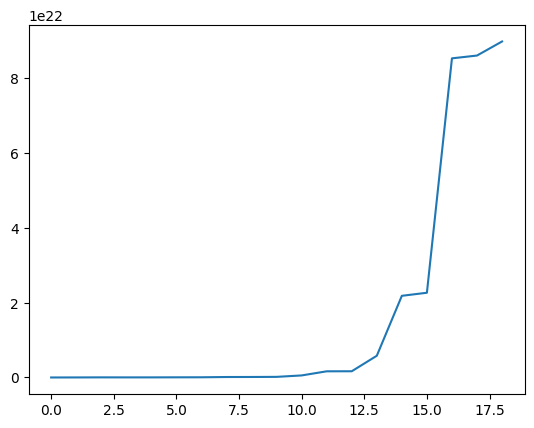

In [17]:
def test(model, true_snapshots):
    snapshot_ = tf.Variable(np.array(true_snapshots[0,:]).reshape(1,2))
    length = true_snapshots.shape[0]
    loss_test = np.zeros(length)
    print(snapshot_)
    for i in range(1,length):
        _, _, snapshot_, _ = model(snapshot_)
        print(snapshot_)
        loss_test[i] = tf.reduce_sum(tf.square(snapshot_-true_snapshots[i]))
    return loss_test[1:]

loss_test = test(linear_forward_map, tf.Variable(f.T[100:,:], dtype='float32'))
plt.plot(loss_test)

In [18]:
loss_test

array([1.06564846e+18, 1.13433932e+19, 3.22034377e+19, 2.40359707e+19,
       2.66457275e+19, 4.27946022e+19, 5.32657177e+19, 1.23558103e+20,
       1.34124973e+20, 1.65963540e+20, 5.46518711e+20, 1.64754594e+21,
       1.66107095e+21, 5.79950366e+21, 2.17971610e+22, 2.26158704e+22,
       8.51752107e+22, 8.59235648e+22, 8.96771890e+22])

In [19]:
train_loss_results

[<tf.Tensor: shape=(), dtype=float32, numpy=4.0336984e+16>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.951032e+16>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.9478734e+16>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.9362164e+16>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.9326533e+16>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.922257e+16>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.8994747e+16>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.8630246e+16>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.8161454e+16>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.7595442e+16>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.7105206e+16>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.7004794e+16>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.6687813e+16>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.607431e+16>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.572372e+16>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.5502895e+16>,
 <tf.Tensor: shape=(), dtype=float32, numpy=